<a href="https://colab.research.google.com/github/glm97/Projeto-Redes_Neurais/blob/master/projeto_cml2_glm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install scikit-plot

import numpy as np
import pandas as pd

from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import roc_auc_score, average_precision_score
from sklearn.linear_model import LogisticRegression

import scikitplot as skplt
import matplotlib
import matplotlib.pyplot as plt

from imblearn.over_sampling import SMOTE
from itertools import groupby

Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


# Leitura dos Dados




In [0]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
link = 'https://drive.google.com/open?id=1UhoH-9BqO4_21uHvq3mNLnhho8Xb3XMq'
fluff, id = link.split('=')
print (id) # Verify that you have everything after '='

1UhoH-9BqO4_21uHvq3mNLnhho8Xb3XMq


In [0]:
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('TRN.csv')  
df_TRN = pd.read_csv('TRN.csv', sep='\t', index_col=0)
# df_TRN.to_csv('TRN.csv')

# from google.colab import files
# files.download('TRN.csv')

In [0]:
df_TRN.head()
# df_TRN.describe()

,UF_1,UF_2,UF_3,UF_4,UF_5,UF_6,UF_7,IDADE,SEXO_1,NIVEL_RELACIONAMENTO_CREDITO01,NIVEL_RELACIONAMENTO_CREDITO02,BANCO_REST_IRPF_ULTIMA_1,BANCO_REST_IRPF_ULTIMA_2,BANCO_REST_IRPF_ULTIMA_3,BANCO_REST_IRPF_ULTIMA_4,BANCO_REST_IRPF_ULTIMA_5,BANCO_REST_IRPF_ULTIMA_6,BANCO_REST_IRPF_ULTIMA_7,ATIVIDADE_EMAIL,EXPOSICAO_ENDERECO,EXPOSICAO_EMAIL,EXPOSICAO_TELEFONE,ATIVIDADE_ENDERECO,ATUALIZACAO_ENDERECO,ATUALIZACAO_EMAIL,EXPOSICAO_CONSUMIDOR_EMAILS,EXPOSICAO_CONSUMIDOR_TELEFONES,ATIVIDADE_TELEFONE,VALOR_PARCELA_BOLSA_FAMILIA,FLAG_BOLSA_FAMILIA_1,SIGLA_PARTIDO_FILIADO_1,SIGLA_PARTIDO_FILIADO_2,SIGLA_PARTIDO_FILIADO_3,SIGLA_PARTIDO_FILIADO_4,SIGLA_PARTIDO_FILIADO_5,SIGLA_PARTIDO_FILIADO_6,SIGLA_PARTIDO_FILIADO_7,FLAG_FILIADO_PARTIDO_POLITICO_1,FLAG_PROUNI_1,RENDA_VIZINHANCA_1,...,CEP1_3,CEP1_4,CEP1_5,CEP2_1,CEP2_2,CEP2_3,CEP2_4,CEP2_5,CEP2_6,CEP2_7,CEP2_8,CEP2_9,CEP3_1,CEP3_2,CEP3_3,CEP3_4,CEP3_5,CEP3_6,CEP3_7,CEP3_8,CEP3_9,CEP3_10,CEP3_11,CEP3_12,CEP4_1,CEP4_2,CEP4_3,CEP4_4,CEP4_5,CEP4_6,CEP4_7,CEP4_8,CEP4_9,CEP4_10,CEP4_11,CEP4_12,CEP4_13,CEP4_14,IND_BOM_1_1,IND_BOM_1_2
INDEX,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,1,1,1,0,0,0,0,0.135098,1,0.222222,0.0,0,0,0,0,0,1,1,5.881235e-18,0.041667,0.000000,0.000000,0.105588,0.796392,-5.140958e-17,0.0,0.1,1.316491e-01,0.000000,0,1,1,1,0,0,0,0,0,1,0,...,1,0,0,1,0,0,1,0,1,0,1,0,0,0,0,1,0,1,1,0,1,0,0,1,0,0,1,0,1,0,0,0,1,1,0,1,1,1,0,1
1,1,0,1,0,0,1,0,0.273504,1,0.111111,0.0,0,0,0,0,0,1,1,5.881235e-18,0.013889,0.000000,0.000000,0.147356,0.979968,-5.140958e-17,0.0,0.0,-2.188272e-17,0.000000,0,1,1,1,0,0,0,0,0,0,0,...,0,1,0,1,1,1,0,0,0,0,1,0,0,1,1,1,0,0,0,1,0,0,1,0,1,1,1,0,1,0,0,1,0,1,1,0,0,0,1,0
2,1,0,1,0,0,1,0,0.281910,0,1.000000,0.0,0,0,0,0,0,1,1,5.881235e-18,0.500000,0.000000,0.000000,0.147356,0.398645,-5.140958e-17,0.0,0.0,-2.188272e-17,0.000000,0,1,1,1,0,0,0,0,0,0,0,...,0,1,0,1,1,1,0,0,0,0,1,0,1,1,0,0,0,0,1,0,1,0,0,1,1,1,0,1,1,0,1,1,0,0,0,0,1,0,1,0
3,1,1,1,0,0,0,0,0.225741,0,0.111111,0.0,1,1,0,0,0,0,0,4.788559e-01,0.083333,0.115789,0.055556,0.147356,0.398645,8.325188e-02,0.2,0.3,4.859488e-01,0.000000,0,1,1,1,0,0,0,0,0,1,0,...,1,0,0,1,1,0,0,0,0,1,1,0,1,0,0,1,0,1,1,0,0,0,0,1,0,0,1,0,1,0,1,1,0,1,1,0,1,0,1,0
4,1,1,0,0,0,1,0,0.480403,0,0.111111,0.0,0,0,0,0,0,1,1,5.881235e-18,0.208333,0.000000,0.111111,0.151604,0.398645,-5.140958e-17,0.0,0.5,1.689438e-01,0.458333,1,1,1,1,0,0,0,0,0,1,0,...,1,0,1,0,1,1,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,1,1,0,0,0,0,1,1,1,1,0,0,1,0,1,1,0


Separando as classes para dividir os conjuntos de treinamento, validação e teste.

In [0]:
# IND_BOM_1_1 e IND_BOM_1_2 indicam quem é bom pagador e quem não, como uma é o inverso da outra, basta utilizar somente uma delas

# # classe1 = df_TRN[df_TRN['IND_BOM_1_1'] == 0]
# classe2 = df_TRN[df_TRN['IND_BOM_1_1'] == 1]
# # classe1.to_csv('classe1.csv')
# classe2.to_csv('classe2.csv')

# # from google.colab import files
# # files.download('classe1.csv')
# # files.download('classe2.csv')

# uploaded = drive.CreateFile({'title': 'classe2.csv'})
# uploaded.SetContentFile('classe2.csv')
# uploaded.Upload()
# print('Uploaded file with ID {}'.format(uploaded.get('id')))

Uploaded file with ID 13phTJn2_mNv7n_LHE5BsHVEnBcKod3IQ


In [0]:
link = 'https://drive.google.com/open?id=1xQCTHhAbjW6YXhjgwSx0yrHnRtwy-Kjg'
fluff, id = link.split('=')
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('classe1.csv')  
df_classe1 = pd.read_csv('classe1.csv', sep=',', index_col=0)

In [0]:
df_classe1.head()

,UF_1,UF_2,UF_3,UF_4,UF_5,UF_6,UF_7,IDADE,SEXO_1,NIVEL_RELACIONAMENTO_CREDITO01,NIVEL_RELACIONAMENTO_CREDITO02,BANCO_REST_IRPF_ULTIMA_1,BANCO_REST_IRPF_ULTIMA_2,BANCO_REST_IRPF_ULTIMA_3,BANCO_REST_IRPF_ULTIMA_4,BANCO_REST_IRPF_ULTIMA_5,BANCO_REST_IRPF_ULTIMA_6,BANCO_REST_IRPF_ULTIMA_7,ATIVIDADE_EMAIL,EXPOSICAO_ENDERECO,EXPOSICAO_EMAIL,EXPOSICAO_TELEFONE,ATIVIDADE_ENDERECO,ATUALIZACAO_ENDERECO,ATUALIZACAO_EMAIL,EXPOSICAO_CONSUMIDOR_EMAILS,EXPOSICAO_CONSUMIDOR_TELEFONES,ATIVIDADE_TELEFONE,VALOR_PARCELA_BOLSA_FAMILIA,FLAG_BOLSA_FAMILIA_1,SIGLA_PARTIDO_FILIADO_1,SIGLA_PARTIDO_FILIADO_2,SIGLA_PARTIDO_FILIADO_3,SIGLA_PARTIDO_FILIADO_4,SIGLA_PARTIDO_FILIADO_5,SIGLA_PARTIDO_FILIADO_6,SIGLA_PARTIDO_FILIADO_7,FLAG_FILIADO_PARTIDO_POLITICO_1,FLAG_PROUNI_1,RENDA_VIZINHANCA_1,...,CEP1_3,CEP1_4,CEP1_5,CEP2_1,CEP2_2,CEP2_3,CEP2_4,CEP2_5,CEP2_6,CEP2_7,CEP2_8,CEP2_9,CEP3_1,CEP3_2,CEP3_3,CEP3_4,CEP3_5,CEP3_6,CEP3_7,CEP3_8,CEP3_9,CEP3_10,CEP3_11,CEP3_12,CEP4_1,CEP4_2,CEP4_3,CEP4_4,CEP4_5,CEP4_6,CEP4_7,CEP4_8,CEP4_9,CEP4_10,CEP4_11,CEP4_12,CEP4_13,CEP4_14,IND_BOM_1_1,IND_BOM_1_2
INDEX,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,1,1,1,0,0,0,0,0.135098,1,0.222222,0.0,0,0,0,0,0,1,1,5.881235e-18,0.041667,0.000000,0.000000,0.105588,0.796392,-5.140958e-17,0.0,0.1,0.131649,0.000000,0,1,1,1,0,0,0,0,0,1,0,...,1,0,0,1,0,0,1,0,1,0,1,0,0,0,0,1,0,1,1,0,1,0,0,1,0,0,1,0,1,0,0,0,1,1,0,1,1,1,0,1
10,1,0,1,1,0,0,0,0.654703,0,0.111111,0.0,0,0,0,0,0,1,1,5.881235e-18,0.333333,0.000000,0.083333,0.147356,0.591956,-5.140958e-17,0.0,0.2,0.085461,0.098958,1,1,1,1,0,0,0,0,0,1,0,...,0,1,1,0,1,0,0,1,0,1,1,0,1,0,0,1,0,0,1,1,1,0,0,0,1,0,1,1,1,1,0,1,0,1,0,0,0,0,0,1
11,1,1,1,0,0,0,0,0.097444,1,0.111111,0.0,0,0,0,0,0,1,1,6.589801e-01,0.027778,0.136842,0.083333,0.151604,0.815862,8.325188e-02,0.6,0.4,0.677012,0.000000,0,1,1,1,0,0,0,0,0,1,0,...,0,0,0,1,0,1,1,0,0,0,0,1,1,0,1,0,0,1,0,1,0,1,0,0,1,0,1,0,0,1,0,1,0,1,0,1,0,1,0,1
12,1,0,1,0,1,0,0,0.398961,0,0.111111,0.0,0,0,0,0,0,1,1,5.881235e-18,0.013889,0.000000,0.055556,0.151604,0.850630,-5.140958e-17,0.0,0.3,0.168944,0.000000,0,1,1,1,0,0,0,0,0,0,0,...,1,1,0,0,1,1,0,0,0,0,1,1,1,0,1,0,1,0,0,1,1,0,0,0,1,1,1,0,0,0,1,1,1,0,1,0,0,0,0,1
17,1,1,1,0,0,0,0,0.142254,0,0.111111,0.0,0,0,0,0,0,1,1,2.162425e-01,0.125000,0.042105,0.111111,0.152312,0.160831,2.817388e-01,0.2,0.5,0.169518,0.000000,0,1,1,1,0,0,0,0,0,1,0,...,0,0,0,1,0,1,1,0,0,0,0,1,1,0,1,0,0,1,0,1,0,1,0,0,1,0,0,0,1,1,1,0,0,1,0,1,0,1,0,1


In [0]:
link = 'https://drive.google.com/open?id=13phTJn2_mNv7n_LHE5BsHVEnBcKod3IQ'
fluff, id = link.split('=')
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('classe2.csv')  
df_classe2 = pd.read_csv('classe2.csv', sep=',', index_col=0)

In [0]:
df_classe2.head()

,UF_1,UF_2,UF_3,UF_4,UF_5,UF_6,UF_7,IDADE,SEXO_1,NIVEL_RELACIONAMENTO_CREDITO01,NIVEL_RELACIONAMENTO_CREDITO02,BANCO_REST_IRPF_ULTIMA_1,BANCO_REST_IRPF_ULTIMA_2,BANCO_REST_IRPF_ULTIMA_3,BANCO_REST_IRPF_ULTIMA_4,BANCO_REST_IRPF_ULTIMA_5,BANCO_REST_IRPF_ULTIMA_6,BANCO_REST_IRPF_ULTIMA_7,ATIVIDADE_EMAIL,EXPOSICAO_ENDERECO,EXPOSICAO_EMAIL,EXPOSICAO_TELEFONE,ATIVIDADE_ENDERECO,ATUALIZACAO_ENDERECO,ATUALIZACAO_EMAIL,EXPOSICAO_CONSUMIDOR_EMAILS,EXPOSICAO_CONSUMIDOR_TELEFONES,ATIVIDADE_TELEFONE,VALOR_PARCELA_BOLSA_FAMILIA,FLAG_BOLSA_FAMILIA_1,SIGLA_PARTIDO_FILIADO_1,SIGLA_PARTIDO_FILIADO_2,SIGLA_PARTIDO_FILIADO_3,SIGLA_PARTIDO_FILIADO_4,SIGLA_PARTIDO_FILIADO_5,SIGLA_PARTIDO_FILIADO_6,SIGLA_PARTIDO_FILIADO_7,FLAG_FILIADO_PARTIDO_POLITICO_1,FLAG_PROUNI_1,RENDA_VIZINHANCA_1,...,CEP1_3,CEP1_4,CEP1_5,CEP2_1,CEP2_2,CEP2_3,CEP2_4,CEP2_5,CEP2_6,CEP2_7,CEP2_8,CEP2_9,CEP3_1,CEP3_2,CEP3_3,CEP3_4,CEP3_5,CEP3_6,CEP3_7,CEP3_8,CEP3_9,CEP3_10,CEP3_11,CEP3_12,CEP4_1,CEP4_2,CEP4_3,CEP4_4,CEP4_5,CEP4_6,CEP4_7,CEP4_8,CEP4_9,CEP4_10,CEP4_11,CEP4_12,CEP4_13,CEP4_14,IND_BOM_1_1,IND_BOM_1_2
INDEX,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,1,0,1,0,0,1,0,0.273504,1,0.111111,0.0,0,0,0,0,0,1,1,5.881235e-18,0.013889,0.000000,0.000000,0.147356,0.979968,-5.140958e-17,0.0,0.0,-2.188272e-17,0.000000,0,1,1,1,0,0,0,0,0,0,0,...,0,1,0,1,1,1,0,0,0,0,1,0,0,1,1,1,0,0,0,1,0,0,1,0,1,1,1,0,1,0,0,1,0,1,1,0,0,0,1,0
2,1,0,1,0,0,1,0,0.281910,0,1.000000,0.0,0,0,0,0,0,1,1,5.881235e-18,0.500000,0.000000,0.000000,0.147356,0.398645,-5.140958e-17,0.0,0.0,-2.188272e-17,0.000000,0,1,1,1,0,0,0,0,0,0,0,...,0,1,0,1,1,1,0,0,0,0,1,0,1,1,0,0,0,0,1,0,1,0,0,1,1,1,0,1,1,0,1,1,0,0,0,0,1,0,1,0
3,1,1,1,0,0,0,0,0.225741,0,0.111111,0.0,1,1,0,0,0,0,0,4.788559e-01,0.083333,0.115789,0.055556,0.147356,0.398645,8.325188e-02,0.2,0.3,4.859488e-01,0.000000,0,1,1,1,0,0,0,0,0,1,0,...,1,0,0,1,1,0,0,0,0,1,1,0,1,0,0,1,0,1,1,0,0,0,0,1,0,0,1,0,1,0,1,1,0,1,1,0,1,0,1,0
4,1,1,0,0,0,1,0,0.480403,0,0.111111,0.0,0,0,0,0,0,1,1,5.881235e-18,0.208333,0.000000,0.111111,0.151604,0.398645,-5.140958e-17,0.0,0.5,1.689438e-01,0.458333,1,1,1,1,0,0,0,0,0,1,0,...,1,0,1,0,1,1,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,1,1,0,0,0,0,1,1,1,1,0,0,1,0,1,1,0
5,0,1,1,0,0,0,1,0.219323,0,0.111111,0.0,0,0,0,0,0,1,1,5.881235e-18,0.041667,0.000000,0.000000,0.147356,0.398645,-5.140958e-17,0.0,0.0,-2.188272e-17,0.000000,0,1,1,1,0,0,0,0,0,0,0,...,1,1,0,1,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,1,1,1,1,0,1,0,1,1,0,0,0,1,1,0,1,0,0,1,1,0


In [0]:
# link = 'https://drive.google.com/open?id=1xQCTHhAbjW6YXhjgwSx0yrHnRtwy-Kjg'
# fluff, id = link.split('=')
# downloaded = drive.CreateFile({'id':id}) 
# downloaded.GetContentFile('teste.csv')  
# df_teste = pd.read_csv('teste.csv', sep='\t')

In [0]:

# X = df_TRN.drop(['INDEX', 'IND_BOM_1_1', 'IND_BOM_1_2'], axis = 1)
# y = df_TRN[['IND_BOM_1_1']]

X1 = df_classe1.iloc[:, 0:-2].values
y1 = df_classe1.iloc[:, -2].values

X2 = df_classe2.iloc[:, 0:-2].values
y2 = df_classe2.iloc[:, -2].values

# Separação de grupos de treinamento, teste e validação

In [0]:
## Treino: 50%, Validação: 25%, Teste: 25%
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=1/4, 
                                                    random_state=42, stratify=y1)

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=1/4,
                                                  random_state=42, stratify=y2)
X_test = np.concatenate((X1_test,X2_test))
y_test = np.concatenate((y1_test,y2_test))

In [0]:
# import pickle

# # with open('X_test.pickle', 'wb') as fp:
# #   pickle.dump(X_test, fp)

# with open('y_test.pickle', 'wb') as fp:
#   pickle.dump(y_test, fp)

# uploaded = drive.CreateFile({'title': 'y_test.pickle'})
# uploaded.SetContentFile('y_test.pickle')
# uploaded.Upload()

In [0]:
X1_train, X1_val, y1_train, y1_val = train_test_split(X1_train, y1_train, test_size=1/3, 
                                                  random_state=42, stratify=y1_train)

X2_train, X2_val, y2_train, y2_val = train_test_split(X2_train, y2_train, test_size=1/3,
                                                  random_state=42, stratify=y2_train)

In [0]:
X_train = np.concatenate((X1_train,X2_train))
y_train = np.concatenate((y1_train,y2_train))

X_val = np.concatenate((X1_val,X2_val))
y_val = np.concatenate((y1_val,y2_val))

NameError: ignored

# Sampling e Normalização dos Dados

In [0]:
print(df_TRN['IND_BOM_1_1'].value_counts())
print(pd.value_counts(df_TRN['IND_BOM_1_1'], normalize=True))
print(len(X1_train), '\n', len(X2_train), '\n', len(X1_val), '\n', len(X2_val))

1    255098
0    134098
Name: IND_BOM_1_1, dtype: int64
1    0.655449
0    0.344551
Name: IND_BOM_1_1, dtype: float64
67048 
 127548 
 33525 
 63775


Há uma classe majoritária e uma minoritária. Vamos usar deixá-las do mesmo tamanho, para que os elementos tenham a mesma chance de ser utilizados. Iremos usar o SMOTE para isso.

In [0]:
scaler = StandardScaler()
X1_train = scaler.fit_transform(X1_train)
X1_val = scaler.fit_transform(X1_val)
X1_test = scaler.transform(X1_test)

In [0]:
smt = SMOTE(random_state=2, ratio = 1)
X1_train, y1_train = smt.fit_sample(X1_train, y1_train)

ValueError: ignored

In [0]:
print(pd.value_counts(y_train, normalize=True))


1    0.5
0    0.5
dtype: float64


## Definição e Treino da Rede

In [0]:
# Número de features do nosso data set.
input_dim = X_train.shape[1]

# Aqui criamos o esboço da rede.
classifier = Sequential()

# Agora adicionamos a primeira camada escondida contendo 16 neurônios e função de ativação
# tangente hiperbólica. Por ser a primeira camada adicionada à rede, precisamos especificar
# a dimensão de entrada (número de features do data set).
classifier.add(Dense(16, activation='tanh', input_dim=input_dim))

# Em seguida adicionamos a camada de saída. Como nosso problema é binário só precisamos de
# 1 neurônio com função de ativação sigmoidal. A partir da segunda camada adicionada keras já
# consegue inferir o número de neurônios de entrada (16) e nós não precisamos mais especificar.
classifier.add(Dense(1, activation='sigmoid'))

# Por fim compilamos o modelo especificando um otimizador, a função de custo, e opcionalmente
# métricas para serem observadas durante treinamento.
classifier.compile(optimizer='adam', loss='mean_squared_error')

Instructions for updating:
Colocations handled automatically by placer.


In [0]:
# Para treinar a rede passamos o conjunto de treinamento e especificamos o tamanho do mini-batch,
# o número máximo de épocas, e opcionalmente callbacks. No seguinte exemplo utilizamos early
# stopping para interromper o treinamento caso a performance não melhore em um conjunto de validação.
history = classifier.fit(X_train, y_train, batch_size=64, epochs=100000, 
                         callbacks=[EarlyStopping(patience=3)], validation_data=(X_val, y_val))

Instructions for updating:
Use tf.cast instead.
Train on 255098 samples, validate on 97299 samples
Epoch 1/100000
255098/255098 [==============================] - 21s 81us/step - loss: 0.2259 - val_loss: 0.2264
Epoch 2/100000
255098/255098 [==============================] - 16s 64us/step - loss: 0.2192 - val_loss: 0.2274
Epoch 3/100000
255098/255098 [==============================] - 15s 61us/step - loss: 0.2159 - val_loss: 0.2223
Epoch 4/100000
255098/255098 [==============================] - 15s 60us/step - loss: 0.2135 - val_loss: 0.2233
Epoch 5/100000
255098/255098 [==============================] - 15s 60us/step - loss: 0.2118 - val_loss: 0.2240
Epoch 6/100000
255098/255098 [==============================] - 15s 60us/step - loss: 0.2105 - val_loss: 0.2262


In [0]:
def extract_final_losses(history):
    """Função para extrair o melhor loss de treino e validação.
    
    Argumento(s):
    history -- Objeto retornado pela função fit do keras.
    
    Retorno:
    Dicionário contendo o melhor loss de treino e de validação baseado 
    no menor loss de validação.
    """
    train_loss = history.history['loss']
    val_loss = history.history['val_loss']
    idx_min_val_loss = np.argmin(val_loss)
    return {'train_loss': train_loss[idx_min_val_loss], 'val_loss': val_loss[idx_min_val_loss]}

def plot_training_error_curves(history):
    """Função para plotar as curvas de erro do treinamento da rede neural.
    
    Argumento(s):
    history -- Objeto retornado pela função fit do keras.
    
    Retorno:
    A função gera o gráfico do treino da rede e retorna None.
    """
    train_loss = history.history['loss']
    val_loss = history.history['val_loss']
    
    fig, ax = plt.subplots()
    ax.plot(train_loss, label='Train')
    ax.plot(val_loss, label='Validation')
    ax.set(title='Training and Validation Error Curves', xlabel='Epochs', ylabel='Loss (MSE)')
    ax.legend()
    plt.show()

def compute_performance_metrics(y, y_pred_class, y_pred_scores=None):
    accuracy = accuracy_score(y, y_pred_class)
    recall = recall_score(y, y_pred_class)
    precision = precision_score(y, y_pred_class)
    f1 = f1_score(y, y_pred_class)
    performance_metrics = (accuracy, recall, precision, f1)
    if y_pred_scores is not None:
        skplt.metrics.plot_ks_statistic(y, y_pred_scores)
        plt.show()
        y_pred_scores = y_pred_scores[:, 1]
        auroc = roc_auc_score(y, y_pred_scores)
        aupr = average_precision_score(y, y_pred_scores)
        performance_metrics = performance_metrics + (auroc, aupr)
    return performance_metrics

def print_metrics_summary(accuracy, recall, precision, f1, auroc=None, aupr=None):
    print()
    print("{metric:<18}{value:.4f}".format(metric="Accuracy:", value=accuracy))
    print("{metric:<18}{value:.4f}".format(metric="Recall:", value=recall))
    print("{metric:<18}{value:.4f}".format(metric="Precision:", value=precision))
    print("{metric:<18}{value:.4f}".format(metric="F1:", value=f1))
    if auroc is not None:
        print("{metric:<18}{value:.4f}".format(metric="AUROC:", value=auroc))
    if aupr is not None:
        print("{metric:<18}{value:.4f}".format(metric="AUPR:", value=aupr))

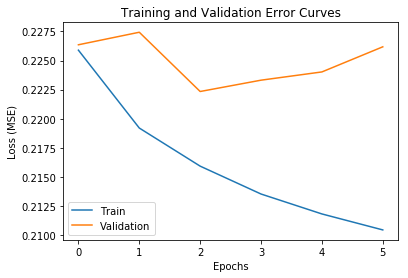

In [0]:
plot_training_error_curves(history)

## Predições no Conjunto de Teste

Matriz de confusão no conjunto de teste:
[[21144 12381]
 [23569 40205]]

Train Loss:       0.2159
Validation Loss:  0.2223

Performance no conjunto de teste:


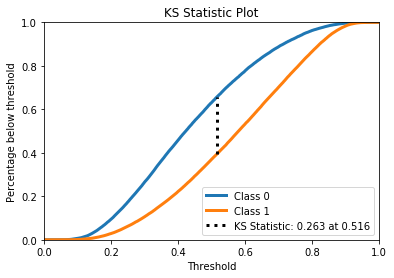


Accuracy:         0.6305
Recall:           0.6304
Precision:        0.7646
F1:               0.6910
AUROC:            0.6800
AUPR:             0.7902


In [0]:
# Fazer predições no conjunto de teste
y_pred_scores = classifier.predict(X_test)
y_pred_class = classifier.predict_classes(X_test, verbose=0)
y_pred_scores_0 = 1 - y_pred_scores
y_pred_scores = np.concatenate([y_pred_scores_0, y_pred_scores], axis=1)

## Matriz de confusão
print('Matriz de confusão no conjunto de teste:')
print(confusion_matrix(y_test, y_pred_class))

## Resumo dos resultados
losses = extract_final_losses(history)
print()
print("{metric:<18}{value:.4f}".format(metric="Train Loss:", value=losses['train_loss']))
print("{metric:<18}{value:.4f}".format(metric="Validation Loss:", value=losses['val_loss']))
print('\nPerformance no conjunto de teste:')
accuracy, recall, precision, f1, auroc, aupr = compute_performance_metrics(y_test, y_pred_class, y_pred_scores)
print_metrics_summary(accuracy, recall, precision, f1, auroc, aupr)

# Comparando MLPs com outros classificadores

In [0]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, VotingClassifier

In [0]:
def create_sklearn_compatible_model():
    model = Sequential()
    model.add(Dense(20, activation='tanh', input_dim=input_dim))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

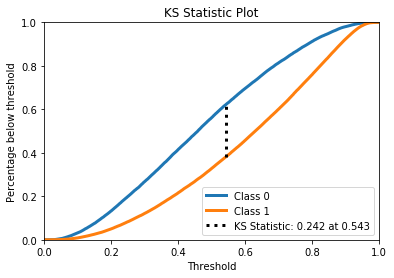

Performance no conjunto de validação:

Accuracy:         0.6340
Recall:           0.6725
Precision:        0.7445
F1:               0.7067
AUROC:            0.6645
AUPR:             0.7815


In [0]:
mlp_clf = KerasClassifier(build_fn=create_sklearn_compatible_model, 
                          batch_size=64, epochs=100,
                          verbose=0)
mlp_clf.fit(X_train, y_train)
mlp_pred_class = mlp_clf.predict(X_val)
mlp_pred_scores = mlp_clf.predict_proba(X_val)
accuracy, recall, precision, f1, auroc, aupr = compute_performance_metrics(y_val, mlp_pred_class, mlp_pred_scores)
print('Performance no conjunto de validação:')
print_metrics_summary(accuracy, recall, precision, f1, auroc, aupr)

In [0]:
svc_clf = SVC(probability=True)  # Modifique aqui os hyperparâmetros
svc_clf.fit(X_train, y_train)
svc_pred_class = svc_clf.predict(X_val)
svc_pred_scores = svc_clf.predict_proba(X_val)
accuracy, recall, precision, f1, auroc, aupr = compute_performance_metrics(y_val, svc_pred_class, svc_pred_scores)
print('Performance no conjunto de validação:')
print_metrics_summary(accuracy, recall, precision, f1, auroc, aupr)

In [0]:
rf_clf = RandomForestClassifier()  # Modifique aqui os hyperparâmetros
rf_clf.fit(X_train, y_train)
rf_pred_class = rf_clf.predict(X_val)
rf_pred_scores = rf_clf.predict_proba(X_val)
accuracy, recall, precision, f1, auroc, aupr = compute_performance_metrics(y_val, rf_pred_class, rf_pred_scores)
print_metrics_summary(accuracy, recall, precision, f1, auroc, aupr)